In [104]:
import torch
from torchvision import transforms

In [105]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in /home/dauce/.cache/torch/hub/pytorch_vision_v0.6.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [106]:
# Download an example image from the pytorch website
import urllib
#url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
url, filename = ("https://media.lesechos.com/api/v1/images/view/5e3126f2d286c252a94951e7/1280x720/0602656207432-web-tete.jpg", "camembert.jpg")
#url, filename = ("https://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX_400x400.jpg", "obama.jpg")
#url, filename = ("https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Mercedes-Benz_Citaro_C2_n%C2%B0401_%28vue_avant%29_-_Sibra_%28Gare_Quai_Nord%2C_Annecy_%2A_automne_2018%29.jpg/1200px-Mercedes-Benz_Citaro_C2_n%C2%B0401_%28vue_avant%29_-_Sibra_%28Gare_Quai_Nord%2C_Annecy_%2A_automne_2018%29.jpg", "bus.jpg")
#url, filename = ("https://www.abc.net.au/news/image/8224014-3x2-940x627.jpg","pieton.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [107]:
from PIL import Image

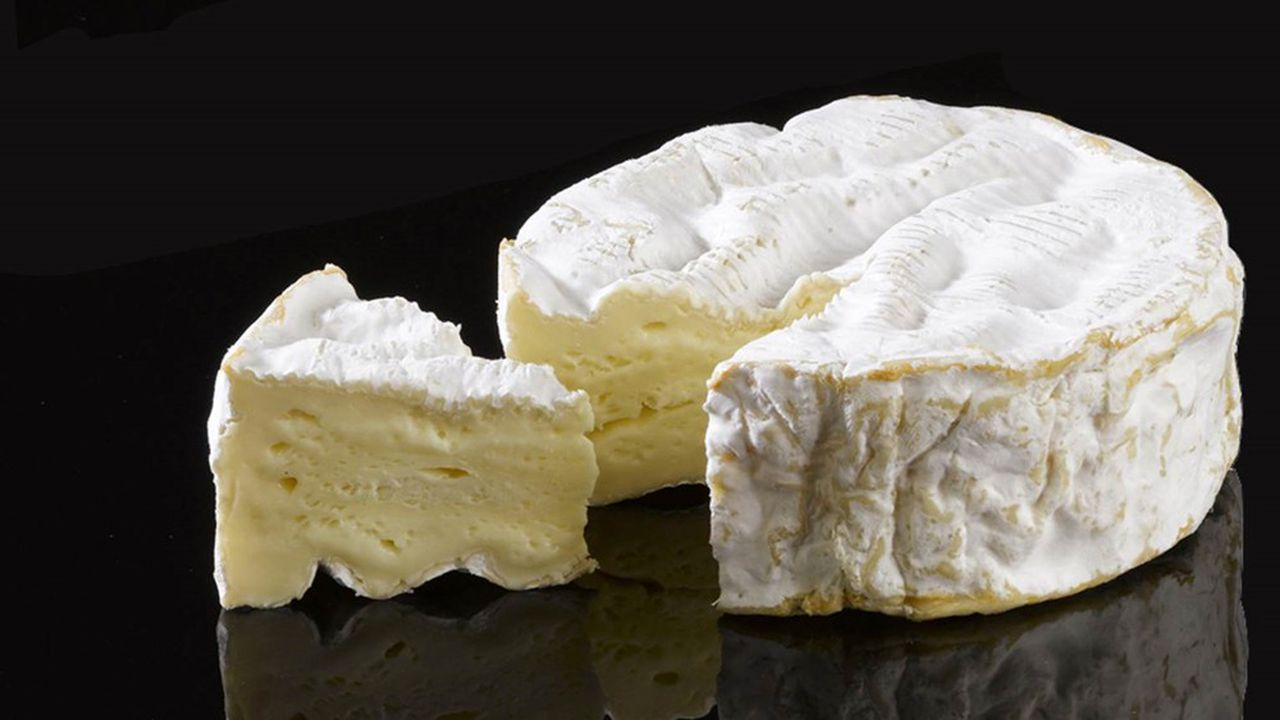

In [108]:
input_image = Image.open(filename)
input_image

In [109]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [110]:
input_tensor.shape

torch.Size([3, 224, 224])

In [111]:
input_batch.shape

torch.Size([1, 3, 224, 224])

In [112]:
with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.


tensor([-1.7681e+00, -5.1592e+00, -4.4571e+00, -2.8161e+00, -1.6920e+00,
        -1.2938e-01, -1.6032e+00, -2.1320e+00, -1.1122e+00, -2.9091e+00,
        -2.8625e+00, -2.7875e+00, -4.7461e+00, -5.5680e+00, -2.8714e+00,
        -3.6023e+00, -2.6316e+00, -3.0234e+00, -2.9977e+00, -1.2154e+00,
        -2.0227e+00, -4.3814e+00, -1.8018e+00, -2.8918e+00, -4.9920e-01,
        -2.0198e+00, -1.5443e+00, -1.6141e+00, -1.4925e+00, -5.5894e+00,
        -2.1563e+00, -1.4457e+00, -8.9520e-01,  1.4193e-01,  2.0904e-01,
        -1.5415e+00,  8.1099e-01,  1.1934e+00,  1.6620e+00, -7.4955e-01,
         1.6628e+00, -1.0166e+00, -3.1551e+00,  2.1364e-01, -1.1696e+00,
        -3.1981e+00,  2.1007e-01, -7.9814e-01, -1.7410e+00,  6.8006e-01,
         9.1997e-01,  1.4963e+00, -1.3715e+00, -4.0794e+00, -8.3529e-01,
        -3.7581e+00, -1.8721e+00, -3.9806e+00, -1.6882e+00, -1.0807e+00,
        -1.4534e+00, -1.9059e-01,  1.1587e+00, -1.0345e+00, -3.0154e+00,
        -1.0958e+00,  2.0554e-01, -3.0219e+00, -7.3

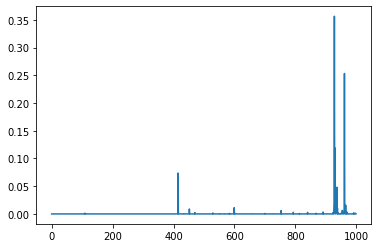

In [113]:
import matplotlib.pyplot as plt
p_out = torch.nn.functional.softmax(output[0], dim=0)
plt.plot(p_out)
plt.show()

After downloading this URL used by keras:
https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

In [114]:
import json
f = open("imagenet_class_index.json", 'r')
class_idx = json.load(f)

In [115]:
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

for idx in list(output[0].sort()[1])[-1:-10:-1]:
    print(int(idx), idx2label[idx], 'p =', float(p_out[idx]))

928 ice_cream p = 0.35646194219589233
961 dough p = 0.25327247381210327
930 French_loaf p = 0.11893271654844284
415 bakery p = 0.07373981922864914
936 head_cabbage p = 0.04819832742214203
927 trifle p = 0.019727880135178566
965 burrito p = 0.015787754207849503
599 honeycomb p = 0.011167787946760654
931 bagel p = 0.010850422084331512
